# First attempt of clustering the publications from Science Mag.

#### Steps of BERTopic

![Alt text](./image/StepsOfBerTopic.png)

### Customizing is also possible
![Alt text](./image/Custmizing_SemanticScholar_Steps.png)

In [756]:
import pandas as pd
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 100)
from custom_functions import cf_clustering as cfc

# This is required when you're using jupyter notebook and want to make changes to your custom function
import importlib
importlib.reload(cfc)

<module 'custom_functions.cf_clustering' from '/home/pclinux/spiced/data_science/capstone_project/convergence_oracle/Playground_KT/fetching/0_Semantic_API_kt/custom_functions/cf_clustering.py'>

# BERTopic on a single year

Length of the dataset:  104


,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,publicationDate,name,title_abstract_studyfield
0,Biological Society of Washington,,1900,0,0,0,,1900-04-13,Science,Biological Society Washington
1,TORREY BOTANICAL CLUB.,,1900,0,1,0,"['Medicine', 'History']",1900-05-04,Science,TORREY BOTANICAL CLUB. Medicine History
2,LINGUISTIC FAMILIES IN MEXICO.,,1900,0,0,0,"['Sociology', 'Medicine']",1900-05-04,Science,LINGUISTIC FAMILIES MEXICO. Sociology Medicine
3,A NEW ENZYME OF GENERAL OCCURRENCE IN ORGANISMIS.,,1900,0,112,2,"['Chemistry', 'Medicine']",1900-05-04,Science,NEW ENZYME GENERAL OCCURRENCE ORGANISMIS. Chemistry Medicine
4,SOME RECENT CONTRIBUTIONS TO TERRESTRIAL MAGNETISM.,During the past five years a most remarkable interest in magnetic work has been shown throughout...,1900,0,2,0,"['Geology', 'Physics', 'Medicine']",1900-04-27,Science,RECENT CONTRIBUTIONS TERRESTRIAL MAGNETISM. past years remarkable magnetic work shown civilized ...


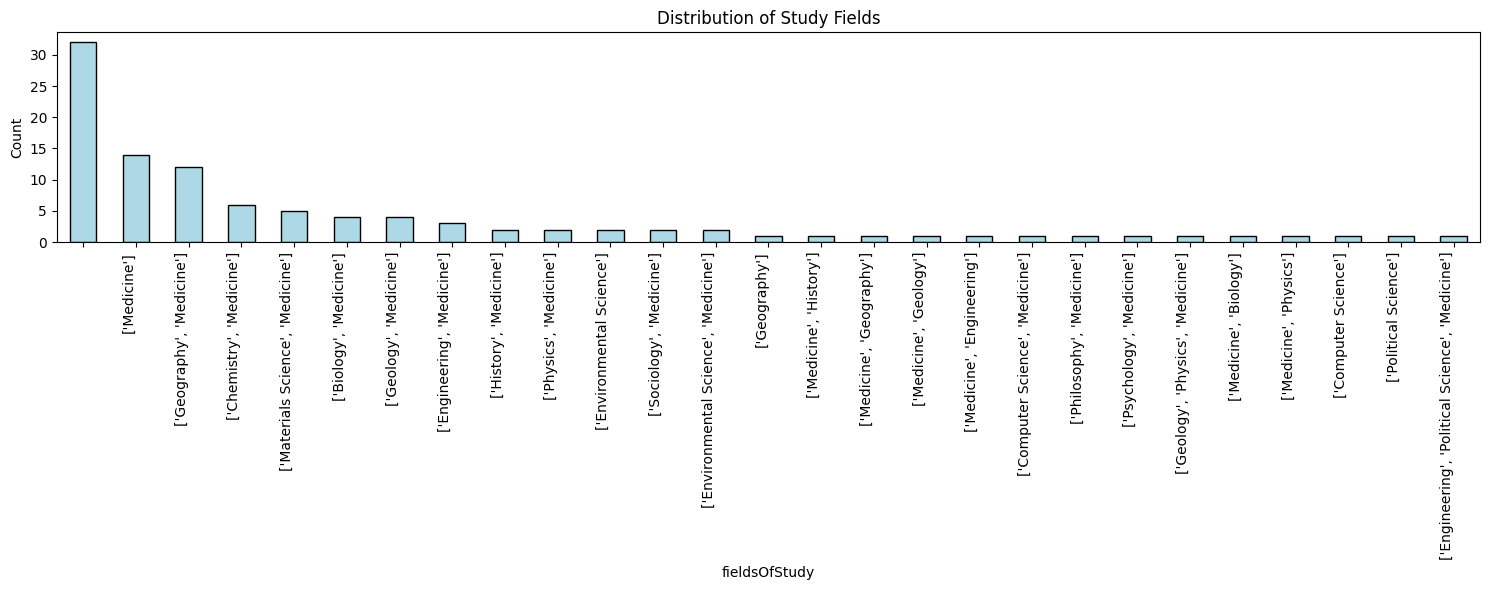

In [293]:
# Load and the data set and apply a year filter:
years = [1900]
sy_df = cfc.load_clean_dataset("./data/1880-2023_Science_48966.csv",years)
display(sy_df.head())
cfc.viz_study_field_distribution(sy_df)

In [294]:
# Create clusters for the selected single year: ...
sy_model,sy_topics,sy_proba = cfc.cluster_data(sy_df,min_topic_size=2,fine_tune_label=True,get_topics=True,get_proba=True,ngram=3)
# Saving the BERTopic model
sy_model.save("./models/bertopic_model_"+str(years[0]))
display(sy_model.get_topic_info())
sy_model.visualize_topics()

Model fitting completed in 0.06 minutes


,Topic,Count,Name,Representation,Representative_Docs
0,-1,20,-1_geology_science series_geography medicine_manuscripts,"[geology, science series, geography medicine, manuscripts, expedition, diurnal range, collection...",[RECENT CONTRIBUTIONS TERRESTRIAL MAGNETISM. past years remarkable magnetic work shown civilized...
1,0,17,0_mgcl2 solution used_experiments artificial parthenogenesis_solution used experiments_stated mg...,"[mgcl2 solution used, experiments artificial parthenogenesis, solution used experiments, stated ...","[ARTIFICIAL PARTHENOGENESIS SEA URCHINS No. 277 SCIENCE, stated MgCl2 solution used experiments ..."
2,1,10,1_nebraska geology medicine_geology medicine_medicine work geological_nebraska geology,"[nebraska geology medicine, geology medicine, medicine work geological, nebraska geology, geolog...","[TOPOGRAPHIC SURVEY OHIO. Medicine Geography, REPORT INITIAL WORK STATE GEOLOGICAL SURVEY NEBRAS..."
3,2,9,2_medicine botanical notes_botanical notes medicine_botanical notes_notes medicine botanical,"[medicine botanical notes, botanical notes medicine, botanical notes, notes medicine botanical, ...","[BOTANICAL NOTES. Medicine, Torrey Botanical Club, Plant Structures . second book Botany. John M..."
4,3,6,3_biological society washington_science biological society_biological society_washington society,"[biological society washington, science biological society, biological society, washington socie...","[Biological Society Washington, Biological Society Washington, SOCIETY AMERICAN BACTERIOLOGISTS...."
5,4,5,4_history medicine linguistic_medicine linguistic families_languages history medicine_linguistic...,"[history medicine linguistic, medicine linguistic families, languages history medicine, linguist...","[Linguistic Families Mexico, STUDY GREEK LATIN VS. MODERN LANGUAGES. History Medicine, LINGUISTI..."
6,5,5,5_profession engineering medicine_profession engineering_science medicine electrical_engineering...,"[profession engineering medicine, profession engineering, science medicine electrical, engineeri...","[ORIGINAL INVESTIGATIONS ENGINEERING SCHOOLS DUTY PUBLIC PROFESSION. Engineering Medicine, ENGIN..."
7,6,4,6_geography medicine_geography medicine climate_geography medicine international_latitude geogra...,"[geography medicine, geography medicine climate, geography medicine international, latitude geog...","[PROBLEMS LIMNOLOGY. Geography Medicine, INTERNATIONAL PLAN FUTURE STUDY VARIATION LATITUDE. Geo..."
8,7,4,7_aerial voyage medicine_voyage medicine_longest aerial voyage_voyage medicine exotic,"[aerial voyage medicine, voyage medicine, longest aerial voyage, voyage medicine exotic, aerial ...","[CRUISE ALBATROSS. Geography Medicine, EXOTIC MOLLUSCA CALIFORNIA. Geography Medicine, LONGEST A..."
9,8,4,8_knives prehistoric times_knives prehistoric_spearheads knives prehistoric_prehistoric times ar...,"[knives prehistoric times, knives prehistoric, spearheads knives prehistoric, prehistoric times ...","['Arrowpoints, Spearheads Knives Prehistoric Times.', 'ARROWPOINTS, SPEARHEADS KNIVES PREHISTORI..."


In [295]:
sy_embeddings = sy_model._extract_embeddings(sy_df['title_abstract_studyfield'].to_list(), method="document")
sy_embeddings.shape

(104, 384)

In [694]:
# 3d Distance map for the topics
cfc.visualize_intertopic_distances_3d("year_"+str(years[0]),sy_df,sy_topics,sy_model,sy_embeddings)

Step 1/3: Reducing the dimensions of the embeddings ...
Step 2/3: Calculating centroids ...
Step 3/3: Visualizing intertopic distances ...


# BERTopic on the whole Science data set

Length of the dataset:  48966


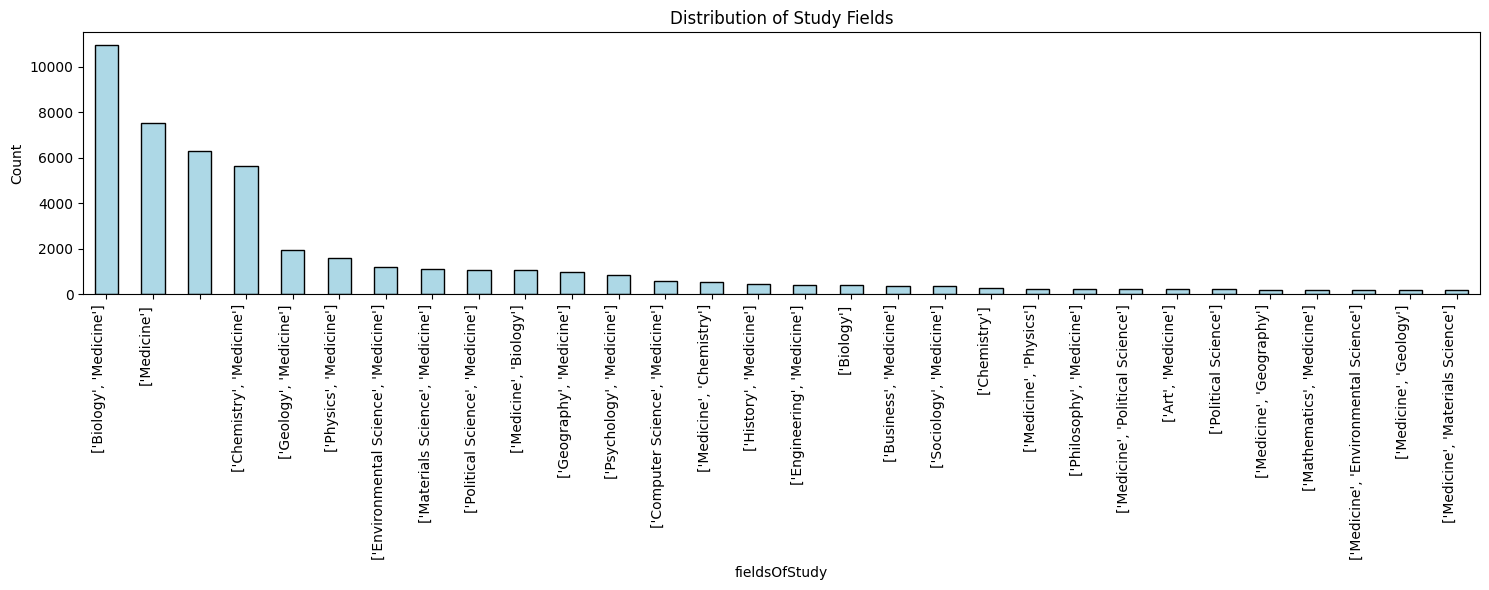

In [729]:
# Load the whole dataset
df = cfc.load_clean_dataset("./data/1880-2023_Science_48966.csv")
cfc.viz_study_field_distribution(df,30)

In [730]:
# Creating clusters for the whole data set
model,topics,proba = cfc.cluster_data(df,min_topic_size=50,fine_tune_label=True,get_topics=True,get_proba=True,ngram=2)
# Saving the BERTopic model
model.save("./models/bertopic_model_whole_data_set.brt")
df = cfc.add_topic_labels(df,topics,proba,model)
display(model.get_topic_info())
model.visualize_topics()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/home/pclinux/spiced/data_science/capstone_project/convergence_oracle/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,publicationDate,name,title_abstract_studyfield,topic_code,proba,topic_list,best_topic
0,Leaving the Fold,Spend your time even for only few minutes to read a book. Reading a book will never reduce and w...,1999,0,10,0,['Medicine'],1999-04-09,Science,"Leaving Fold Spend time minutes read book. Reading book reduce waste time useless. Reading, peop...",129,1.000000,"[(boredom reading, 0.7021911), (hobby why, 0.66534376), (hobby considered, 0.6469468), (hobby, 0...",boredom reading
1,Deformylation of 3-Formoxy Steroids on Activated Alumina.,,1948,0,0,0,"['Chemistry', 'Medicine']",1948-07-23,Science,Deformylation 3-Formoxy Steroids Activated Alumina. Chemistry Medicine,9,0.706447,"[(steroid hormones, 0.64267313), (hormones, 0.63853824), (hormone, 0.61077666), (estrogen recept...",steroid hormones
2,Cloud Formation.,,1893,0,5,0,['Medicine'],1893-06-23,Science,Cloud Formation. Medicine,-1,0.000000,"[(molecular, 0.21975775), (chemistry medicine, 0.1715665), (rna, 0.15597609), (chemistry, 0.1482...",molecular
3,Reviewing Interdisciplinary Research,"I applaud the proposal by Norman Metzger and Richard N. Zare (Policy Forum, Science 's Compass, ...",1999,0,3,0,['Political Science'],1999-02-19,Science,Reviewing Interdisciplinary Research applaud proposal Norman Metzger Richard N. Zare (Policy For...,-1,0.000000,"[(molecular, 0.21975775), (chemistry medicine, 0.1715665), (rna, 0.15597609), (chemistry, 0.1482...",molecular
4,Quasiparticles and Thermal Conductivity,"K. Krishana et al. (1) report that the thermal conductivity, k, of Bi2Sr2CaCu2O8 at low temperat...",1998,0,0,0,,1998-04-03,Science,"Quasiparticles Thermal Conductivity K. Krishana et al. (1) report thermal conductivity, k, Bi2Sr...",49,0.869765,"[(superconductivity, 0.6056652), (hightemperature superconductors, 0.5803087), (superconducting ...",superconductivity


,Topic,Count,Name,Representation,Representative_Docs
0,-1,24996,-1_molecular_chemistry medicine_rna_chemistry,"[molecular, chemistry medicine, rna, chemistry, magnetic, dna, identified, materials, receptor, ...",[Unequivocal determination complex molecular structures using anisotropic NMR measurements Picki...
1,0,1065,0_arabidopsis_pathogens_pathogen_fungi,"[arabidopsis, pathogens, pathogen, fungi, plant cell, plants, plant cells, fungal, arabidopsis t...",[Genome Expansion Gene Loss Powdery Mildew Fungi Reveal Tradeoffs Extreme Parasitism Blight Powd...
2,1,913,1_medicine materials_materials science_materials_chemistry,"[medicine materials, materials science, materials, chemistry, chemistry medicine, science medici...","[Paraffin Embedding. Materials Science Medicine, heat light. Materials Science Medicine, Caucus ..."
3,2,661,2_honey bees_bees_honey bee_honeybees,"[honey bees, bees, honey bee, honeybees, bee, insecticides, insects, pesticides, pests, insect]",[Honey Bees Humans: Shared Innovation discussion sequencing genome honey bee (“Honey bee genome ...
4,3,639,3_geology medicine_medicine geology_medicine geological_geology,"[geology medicine, medicine geology, medicine geological, geology, geologist, geologists, geolog...","[CHEMICAL WORK U. S. GEOLOGICAL SURVEY. Geology Medicine, WORK U. S. GEOLOGICAL SURVEY, 1899-190..."
5,4,565,4_marine ecosystems_fisheries_fishery_ecosystem,"[marine ecosystems, fisheries, fishery, ecosystem, ecological, coral reefs, ecosystems, reefs, r...",[Demographic dynamics smallest marine vertebrates fuel coral reef ecosystem functioning Little f...
6,5,543,5_biodiversity conservation_biodiversity loss_biodiversity_ecology,"[biodiversity conservation, biodiversity loss, biodiversity, ecology, ecological, ecosystem, eco...",[Madagascar’s extraordinary biodiversity: Threats opportunities Madagascar’s unique biota heavil...
7,6,464,6_political science_medicine political_science political_medicine politics,"[political science, medicine political, science political, medicine politics, research political...","[Balance science. Political Science Medicine, AMERICAN ASSOCIATION ADVANCEMENT SCIENCE. Politica..."
8,7,383,7_medicine psychology_psychology medicine_psychology_psychology psychology,"[medicine psychology, psychology medicine, psychology, psychology psychology, psychologists, psy...","[Psychology (I). Medicine, Psychology (I). Medicine, Psychology (I). Medicine]"
9,8,379,8_visual cortex_prefrontal cortex_cortex_parietal cortex,"[visual cortex, prefrontal cortex, cortex, parietal cortex, neural, neuronal, cortical, stimuli,...","[Sakharov: Scientists Welcome Award Nobel Peace Prize 1. T. N. Wiesel D. H. Hubel,J. Neurophysio..."


In [731]:
# Create embeddings
my_embeddings = model._extract_embeddings(df['title_abstract_studyfield'].to_list(), method="document")
my_embeddings.shape

(48966, 384)

In [758]:
# 3d Distance map for the topics
cfc.visualize_intertopic_distances_3d("year_1880-2023",df,topics,model,my_embeddings,include_unclassified=False)

Step 1/3: Reducing the dimensions of the embeddings ...
Step 2/3: Calculating centroids ...
Step 3/3: Visualizing intertopic distances ...
